<a href="https://colab.research.google.com/github/Moutinho1982/Moutinho1982/blob/main/Analises_de_dados_bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [51]:
df = pd.read_excel("/content/Nova_Base.xlsx")

In [12]:
df.head()

,Código da Loja,Estado,Área da Loja,Itens Vendidos,Clientes atendidos,Funcionarios,Horas Trabalhadas - Total da Loja,Data de abertura
0,1,AL,5512,12003168,832153,139,30208,2018-01-01
1,2,AL,4913,9867560,782601,133,28903,2018-01-01
2,3,BA,4496,10006477,837415,121,25690,2018-01-01
3,4,BA,417,1588183,360179,35,7541,2018-01-01
4,5,BA,5600,11642218,774767,137,29275,2018-01-01


In [13]:
df.tail()

,Código da Loja,Estado,Área da Loja,Itens Vendidos,Clientes atendidos,Funcionarios,Horas Trabalhadas - Total da Loja,Data de abertura
752,756,SP,1566,2204555,227452,32,6602,2019-01-01
753,757,SP,2030,4006903,350558,56,11777,2019-01-01
754,759,SP,3294,1758378,141271,44,9412,2019-01-01
755,760,SP,2059,4742829,395044,55,11950,2019-01-01
756,761,TO,4508,12526169,1101766,171,36485,2019-01-01


In [14]:
df.sample(5)

,Código da Loja,Estado,Área da Loja,Itens Vendidos,Clientes atendidos,Funcionarios,Horas Trabalhadas - Total da Loja,Data de abertura
740,744,SP,108,379400,84124,8,1644,2019-01-01
516,518,SP,288,711536,207127,8,1711,2021-01-01
576,578,SP,135,456189,102703,5,1126,2020-01-01
580,582,SP,191,578626,122025,6,1261,2020-01-01
464,466,SP,858,3588664,363042,47,10044,2021-01-01


In [15]:
df.dtypes

Código da Loja                                int64
Estado                                       object
Área da Loja                                  int64
Itens Vendidos                                int64
Clientes atendidos                            int64
Funcionarios                                  int64
Horas Trabalhadas - Total da Loja             int64
Data de abertura                     datetime64[ns]
dtype: object

In [16]:
df.isnull().sum()

Código da Loja                       0
Estado                               0
Área da Loja                         0
Itens Vendidos                       0
Clientes atendidos                   0
Funcionarios                         0
Horas Trabalhadas - Total da Loja    0
Data de abertura                     0
dtype: int64

In [17]:
#retornando a maior quantidade de funcionários
df["Funcionarios"].max()

253

In [18]:
#retornando a menor quantidade de funcionários
df["Funcionarios"].min()

4

In [19]:
df.nlargest(5, "Funcionarios")

,Código da Loja,Estado,Área da Loja,Itens Vendidos,Clientes atendidos,Funcionarios,Horas Trabalhadas - Total da Loja,Data de abertura
381,383,SP,7358,27305737,1741401,253,54723,2021-01-01
28,29,DF,8146,24244157,1396693,252,53096,2018-01-01
483,485,SP,4499,20743582,2008825,247,52062,2021-01-01
749,753,SP,9743,24192239,1216963,241,50579,2019-01-01
450,452,SP,6096,26369168,1272249,238,50565,2021-01-01


In [20]:
df.nsmallest(5,"Funcionarios")

,Código da Loja,Estado,Área da Loja,Itens Vendidos,Clientes atendidos,Funcionarios,Horas Trabalhadas - Total da Loja,Data de abertura
506,508,SP,114,408105,130903,4,980,2021-01-01
540,542,SP,112,404233,89908,4,896,2020-01-01
585,587,SP,175,471506,92533,4,910,2020-01-01
586,588,SP,191,469212,115010,4,948,2020-01-01
613,615,SP,81,353493,125214,4,966,2020-01-01


In [21]:
#Agrupamento de funcionários por dependecia administrativa
df.groupby("Estado")["Funcionarios"].sum()

Estado
AL      272
BA      475
CE     1334
DF     1418
GO      430
MG      566
MS      402
MT      184
PB      367
PE      842
PI      400
PR      138
RJ     5284
RN      312
SE      184
SP    20165
TO      171
Name: Funcionarios, dtype: int64

In [26]:
#Aberturas de lojas por ano
df.groupby(df["Data de abertura"].dt.year)["Estado"].count()

Data de abertura
2018    124
2019    109
2020    262
2021    262
Name: Estado, dtype: int64

In [27]:
#Funcionarios contratados por ano
df.groupby(df["Data de abertura"].dt.year)["Funcionarios"].sum()

Data de abertura
2018     8634
2019     2742
2020     9150
2021    12418
Name: Funcionarios, dtype: int64

In [11]:
df["Horas Trabalhadas"] = df["Horas Trabalhadas - Total da Loja"] / df["Funcionarios"]

In [13]:
df["Produtividade"] = df["Itens Vendidos"] / df["Horas Trabalhadas - Total da Loja"]

In [14]:
#Media de itens vendidos por cliente em cada loja
df["Média de itens vendidos"] = df["Itens Vendidos"] / df["Clientes atendidos"]

In [15]:
#Media de clientes atendidos por cada funcionario em cada loja
df["Média de clientes atendidos"] = df["Clientes atendidos"] / df["Funcionarios"]

In [16]:
df.head()

,Código da Loja,Estado,Área da Loja,Itens Vendidos,Clientes atendidos,Funcionarios,Horas Trabalhadas - Total da Loja,Data de abertura,Horas Trabalhadas,Produtividade,Média de itens vendidos,Média de clientes atendidos
0,1,AL,5512,12003168,832153,139,30208,2018-01-01,217.323741,397.350636,14.424232,5986.712230
1,2,AL,4913,9867560,782601,133,28903,2018-01-01,217.315789,341.402623,12.608673,5884.218045
2,3,BA,4496,10006477,837415,121,25690,2018-01-01,212.314050,389.508641,11.949245,6920.785124
3,4,BA,417,1588183,360179,35,7541,2018-01-01,215.457143,210.606418,4.409427,10290.828571
4,5,BA,5600,11642218,774767,137,29275,2018-01-01,213.686131,397.684646,15.026734,5655.233577


In [33]:
#Estado que vendeu mais itens
df.groupby("Estado")["Itens Vendidos"].sum()

Estado
AL      21870728
BA      37237429
CE      96026819
DF     119422872
GO      32950059
MG      36582667
MS      22909617
MT      11360236
PB      27315165
PE      65153934
PI      30085490
PR       9249045
RJ     542388691
RN      20050217
SE      11852888
SP    1796563557
TO      12526169
Name: Itens Vendidos, dtype: int64

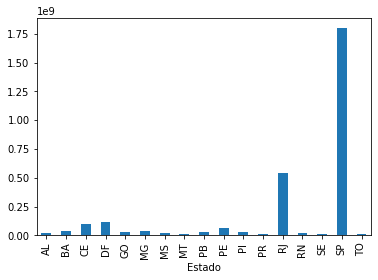

In [39]:
df.groupby("Estado")["Itens Vendidos"].sum().plot.bar()

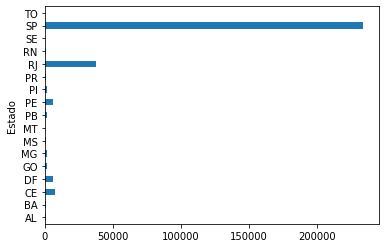

In [40]:
df.groupby("Estado")["Produtividade"].sum().plot.barh()

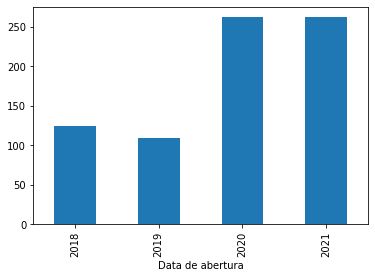

In [46]:
df.groupby(df["Data de abertura"].dt.year)["Estado"].count().plot.bar()

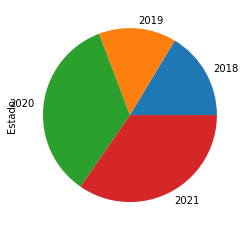

In [48]:
df.groupby(df["Data de abertura"].dt.year)["Estado"].count().plot.pie()

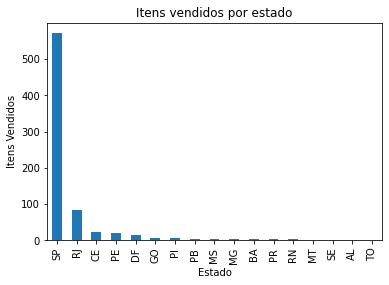

In [49]:
import matplotlib.pyplot as plt
df["Estado"].value_counts().plot.bar(title="Itens vendidos por estado")
plt.xlabel("Estado")
plt.ylabel("Itens Vendidos");

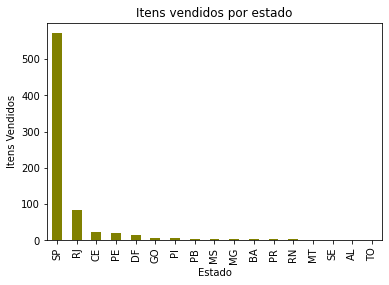

In [55]:
import matplotlib.pyplot as plt
df["Estado"].value_counts().plot.bar(title="Itens vendidos por estado", color="olive")
plt.xlabel("Estado")
plt.ylabel("Itens Vendidos");